# Right Angled Triangle Fractal (Programmable logic)

This notebook will illustrate a right angled triangle fractal that behaves similary to the Sierpinski's triangle fractal. 

Like Sierpinkski's triangle this fractal is created, through recursion, by halfing the size of the original triangle's height and length. 

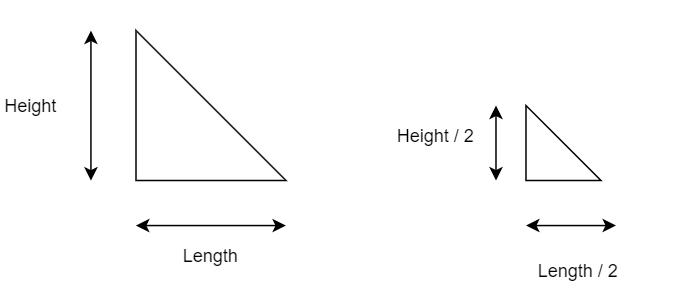

These new lengths are the size of our new triangles which we need 3 of. They are alligned as shown, note how the allignment has the same dimensions as the original triangle 

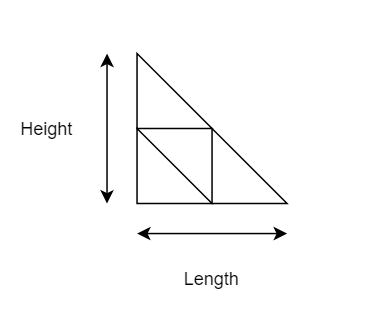

NOTE: This Notebook makes use of the resizer IP, as seen in the Pynq community example "Hello world resizer". See refrences in final cell

# Import libraries

In [1]:
from ipywidgets import *
from PIL import Image
import numpy as np
from IPython.display import display
from pynq import Xlnk
from pynq import Overlay

# Download resizer IP bitstream

In [2]:
resize_design = Overlay(
    "../bitstream/resizer.bit")

Create DMA and Resizer IP objects

In [3]:
dma = resize_design.axi_dma_0
resizer = resize_design.resize_accel_0

# Create an Image object using PIL in SW

Load in the right angled triangle image from the image folder. A PIL image object is also created.

In [4]:
image_path = "images/RAT.png"
original_image = Image.open(image_path)
original_image.load()

# Create pixel array

The following line is used to tell Jupyter that the image should only be 3 components wide. All components holds the same data. We select the first three components. 

Numpy is used to create the array of pixels

In [5]:
input_array = np.array(original_image)[:,:,0:3]

# Display original image

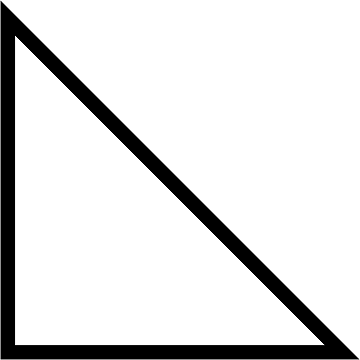

In [6]:
input_image = Image.fromarray(input_array)
display(input_image)

Note the original image size here as the final fractal image should be the same size, as we are essentially filling the original image with the resized images.

In [7]:
old_width, old_height = original_image.size
print("Image size: {}x{} pixels.".format(old_width, old_height))

Image size: 360x360 pixels.


In [8]:
xlnk = Xlnk()   

In [9]:
resizer.write(0x00,0x00) # reset IP

# Create slider 

A slider is created so the user can select the number of iterations they want to execute for the fractal. To operate the slider run this cell then select desired number.

In [10]:
def update(limit):
    
    limit = limit
    
    

limit=widgets.IntSlider(min=1,max=4,step=1)

interact(update, limit=limit);

interactive(children=(IntSlider(value=1, description='limit', max=4, min=1), Output()), _dom_classes=('widget-…

We now cast the slider limit value to an integer, this way it can be used for the number of times the for loop executes

In [11]:
limitIntValue = int(limit.value)

# Create fractal

In the following cell, first, we can see that the limit value obtained from the slider in the previous cell is set as the iterations for a for loop. Based of this number the for loop will execute and resize our image the required number of times. 

The box variables are a tuple that sets the co-ordinates of the resized images. We then paste these boxes to the original image to create our fractal. 

In [12]:
for n in range (limitIntValue):
    
    resizer.write(0x00,0x00)        # Reset IP
    
    
    new_width = int(old_width/2)    # Determine new height and width for resized image
    new_height = int(old_height/2)

    resizer.write(0x10, old_height)
    resizer.write(0x18, old_width)
    resizer.write(0x20, new_height)
    resizer.write(0x28, new_width)
        
    in_buffer = xlnk.cma_array(shape=(old_height, old_width, 3), dtype=np.uint8, cacheable=1)
    out_buffer = xlnk.cma_array(shape=(new_height, new_width, 3), dtype=np.uint8, cacheable=1)
    
    in_buffer[:,:,0:3] = np.array(original_image)[:,:,0:3]
      
    dma.recvchannel.transfer(out_buffer)
    dma.sendchannel.transfer(in_buffer)
    resizer.write(0x00,0x1) # start
    dma.sendchannel.wait()
    dma.recvchannel.wait()  
    resizer.write(0x00,0x00) # reset
    
    xlnk.xlnk_reset()
    
    out_buffer.shape
    
    result = Image.fromarray(np.array(out_buffer, dtype=np.uint8))
    np.array(result).shape
    
    # Create variables to allign top triangle with bottom two
            
    u = int(new_width / 2)
    v = int(3 * new_width / 2)
            
    # Create variables to set box locations
            
    box = (0, 0, new_width, new_height)
    box2 = (0, new_height, new_width, 2 * new_height)
    box3 = (new_width, new_height, 2 * new_width, 2 * new_height)

    # Paste resized images in box locations
        
    original_image.paste(result, box)
    original_image.paste(result, box2)
    original_image.paste(result, box3)

# Display fractal

We can now display our fractal. The image size is displayed to show that the new fractal iterations fits within the original image. 

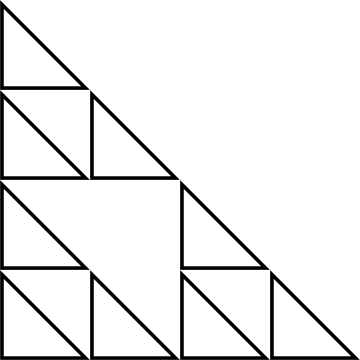

Image size: 360x360 pixels.


In [13]:
display(original_image)
print("Image size: {}x{} pixels.".format(old_width, old_height))

In [15]:
%%timeit

for n in range (limitIntValue):
    
    resizer.write(0x00,0x00)
    resize_factor = 2
    
    new_width = int(old_width/resize_factor)
    new_height = int(old_height/resize_factor)

    resizer.write(0x10, old_height)
    resizer.write(0x18, old_width)
    resizer.write(0x20, new_height)
    resizer.write(0x28, new_width)
        
    in_buffer = xlnk.cma_array(shape=(old_height, old_width, 3), dtype=np.uint8, cacheable=1)
    out_buffer = xlnk.cma_array(shape=(new_height, new_width, 3), dtype=np.uint8, cacheable=1)
    
    in_buffer[:,:,0:3] = np.array(original_image)[:,:,0:3]
      
    dma.recvchannel.transfer(out_buffer)
    dma.sendchannel.transfer(in_buffer)
    resizer.write(0x00,0x1) # start
    dma.sendchannel.wait()
    dma.recvchannel.wait()  
    resizer.write(0x00,0x00) # reset
    
    xlnk.xlnk_reset()
    
    out_buffer.shape
    
    result = Image.fromarray(np.array(out_buffer, dtype=np.uint8))
    np.array(result).shape
    
    # align centers of both images
            
    u = int(new_width / 2)
    v = int(3 * new_width / 2)
            
    # Create variables to set box locations
            
    box = (0, 0, new_width, new_height)
    box2 = (0, new_height, new_width, 2 * new_height)
    box3 = (new_width, new_height, 2 * new_width, 2 * new_height)

    

    # Paste resized images in box locations
        
    original_image.paste(result, box)
    original_image.paste(result, box2)
    original_image.paste(result, box3)

10 loops, best of 3: 71.1 ms per loop


# Refrences

https://github.com/Xilinx/PYNQ-HelloWorld

https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks_advanced_features.ipynb

https://pillow.readthedocs.io/en/3.1.x/index.html

https://github.com/Xilinx/PYNQ/blob/master/docs/source/python_environment.ipynb